In [120]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import cauchy

In [132]:
np.angle(1j)

1.5707963267948966

In [180]:
N = 6400
omega = cauchy.rvs(loc=0,scale=1,size=N)
theta = np.random.uniform(-np.pi,np.pi,size=N)
Aij = np.ones((N,N)) - np.eye(N)
K = 3

In [169]:

def KURAMOTO(theta,t):
    i,j = np.meshgrid(theta,theta)
    inter = Aij*np.sin(j-i)
    theta = omega + K*inter.sum(axis=0)/N
    return theta
# theta__ = omega + K*inter.sum(axis=0)/N


def KURAMOTO_ivp(t,theta):
    i,j = np.meshgrid(theta,theta)
    inter = Aij*np.sin(j-i)
    theta = omega + K*inter.sum(axis=0)/N
    return theta

def KURAMOTO_mean(theta,t):
    rpsi = 1/N * np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    dtheta = omega + K*r*np.sin(psi-theta)
    return dtheta

def KURAMOTO_mean_ivp(t,theta):
    rpsi = 1/N * np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    dtheta = omega + K*r*np.sin(psi-theta)
    return dtheta
# theta__ = omega + K*inter.sum(axis=0)/N

# inter

In [87]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [161]:
t = np.arange(0,10,0.01)

In [153]:
%load_ext memory_profiler
%load_ext line_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [168]:
%timeit -r 1 -n 144 RK4(KURAMOTO_mean,theta,t)

90.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 144 loops each)


In [135]:
sol = RK4(KURAMOTO_mean,theta,t)
sol2 = RK4(KURAMOTO,theta,t)

In [45]:
from scipy.integrate import solve_ivp

In [116]:
sol = solve_ivp(KURAMOTO_ivp,(0,10),theta,dense_output=True)

In [182]:
%memit sol = solve_ivp(KURAMOTO_mean_ivp,(0,10),theta,method="RK45",dense_output=True); sol.sol(t)

peak memory: 649.05 MiB, increment: 106.42 MiB


In [174]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 182
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000021905D563B0>
   status: 0
  success: True
        t: array([ 0.        ,  0.04858467,  0.39593571,  0.82658916,  1.20609231,
        1.55425819,  1.9609267 ,  2.33650142,  2.68844869,  3.01766358,
        3.40584446,  3.79402534,  4.13298242,  4.45775788,  4.76090849,
        5.08386517,  5.44089694,  5.79715284,  6.1489275 ,  6.56602406,
        6.97703924,  7.473334  ,  7.93473648,  8.42254225,  9.05658115,
        9.60725542, 10.        ])
 t_events: None
        y: array([[-3.66364931e-02,  1.06390489e-01,  1.09285975e+00, ...,
         1.80704705e+01,  2.02427956e+01,  2.11388478e+01],
       [-2.99038767e+00, -2.70932814e+00, -5.36414967e-01, ...,
         5.22709367e+01,  5.49446501e+01,  5.77792639e+01],
       [ 1.70086021e+00,  1.71777639e+00,  1.78849736e+00, ...,
         1.88529212e+0

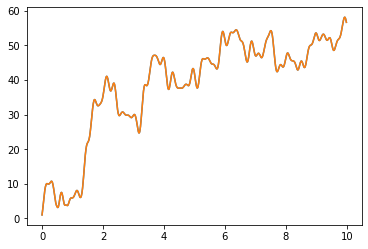

In [164]:
plt.plot(t,abs((np.exp(sol*1j)).sum(axis=1)))
plt.plot(t,abs((np.exp(sol2*1j)).sum(axis=1)))